<a href="https://colab.research.google.com/github/amkorousagi/PLA_AI/blob/main/process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/ro_data.xlsx")

print(df)

      no  Spinbeam_temp  Roller1_speed  Roller2_speed  Roller2_temp     DR  \
0      1            256           3500           4039            95  1.154   
1      2            256           3500           4039            95  1.154   
2      3            256           3500           4039            95  1.154   
3      4            256           3500           4039            95  1.154   
4      5            258           1500           4039            95  2.693   
..   ...            ...            ...            ...           ...    ...   
791  792            268           1490           4105           100  2.755   
792  793            268           1490           4105           100  2.755   
793  794            268           1500           4105           100  2.737   
794  795            268           1500           4105           100  2.737   
795  796            268           1500           4105           100  2.737   

     FR_speed  Tenacity  Elongation  
0        4000      2.75  

In [ ]:
y = []
for i, r in df.iterrows():
  if r["Roller2_temp"] == 100:
    y.append(0)
  else:
    y.append(1)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
def bal(x):
  l = x.shape[0]
  spin1 = 0
  spin2 = 0
  spin3 = 0
  r1s1 = 0
  r1s2 = 0
  r2s1 = 0
  r2s2 = 0
  r2t1 = 0
  r2t2 = 0
  frs1 = 0
  frs2 = 0
  frs3 = 0
  frs4 = 0
  for i,r in x.iterrows():
    if 250 <= r["Spinbeam_temp"] <= 253:
      spin1 = spin1 +1
    if  262 <= r["Spinbeam_temp"] <= 265:
      spin2 = spin2 +1
    if  266 <= r["Spinbeam_temp"] <= 268:
      spin3 = spin3 +1
    if 1000 <= r["Roller1_speed"] <= 1200:
      r1s1 = r1s1 +1
    if 1501 <= r["Roller1_speed"] <= 3500:
      r1s2 = r1s2 +1
    if 4039 == r["Roller2_speed"]:
      r2s1 = r2s1 +1
    if 4140 <= r["Roller2_speed"] <= 4520:
      r2s2 = r2s2 +1
    if 95 == r["Roller2_temp"]:
      r2t1 = r2t1 +1
    if 105 == r["Roller2_temp"]:
      r2t2 = r2t2 +1
    if 4100 == r["FR_speed"]:
      frs1 = frs1 +1
    if 4200 == r["FR_speed"]:
      frs2 = frs2 +1
    if 4300 == r["FR_speed"]:
      frs3 = frs3 +1
    if 4100 == r["FR_speed"]:
      frs4 = frs4 +1
  print("Spinbeam_temp1 ", (spin1/l)*100 , "%")
  print("Spinbeam_temp2 ", (spin2/l)*100 , "%")
  print("Spinbeam_temp3 ", (spin3/l)*100 , "%")
  print("Roller1_speed1 ", (r1s1/l)*100 , "%")
  print("Roller1_speed2 ", (r1s2/l)*100 , "%")
  print("Roller2_speed1 ", (r2s1/l)*100 , "%")
  print("Roller2_speed2 ", (r2s2/l)*100 , "%")
  print("           Roller2_temp1 95 ", (r2t1/l)*100 , "%")
  print("           Roller2_temp2 105 ", (r2t2/l)*100 , "%")
  print("FR_speed1 ", (frs1/l)*100 , "%")
  print("FR_speed2 ", (frs2/l)*100 , "%")
  print("FR_speed3 ", (frs3/l)*100 , "%")
  print("FR_speed4 ", (frs4/l)*100 , "%")

In [ ]:
bal(df)

Spinbeam_temp1  12.939698492462313 %
Spinbeam_temp2  10.42713567839196 %
Spinbeam_temp3  10.050251256281408 %
Roller1_speed1  2.8894472361809047 %
Roller1_speed2  8.417085427135678 %
Roller2_speed1  6.532663316582915 %
Roller2_speed2  17.964824120603016 %
           Roller2_temp1 95  6.909547738693467 %
           Roller2_temp2 105  1.1306532663316584 %
FR_speed1  1.507537688442211 %
FR_speed2  6.532663316582915 %
FR_speed3  5.025125628140704 %
FR_speed4  1.507537688442211 %


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter


ros = RandomOverSampler(random_state=42)
X_ros, y_res = ros.fit_resample(df,y)

bal(X_ros)

Spinbeam_temp1  7.035519125683059 %
Spinbeam_temp2  5.669398907103825 %
Spinbeam_temp3  5.46448087431694 %
Roller1_speed1  3.415300546448088 %
Roller1_speed2  38.9344262295082 %
Roller2_speed1  32.650273224043715 %
Roller2_speed2  26.297814207650273 %
           Roller2_temp1 95  44.330601092896174 %
           Roller2_temp2 105  5.669398907103825 %
FR_speed1  8.743169398907105 %
FR_speed2  12.158469945355192 %
FR_speed3  2.73224043715847 %
FR_speed4  8.743169398907105 %


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_smote, y_smote = ros.fit_resample(df,y)

bal(X_smote)

Spinbeam_temp1  7.035519125683059 %
Spinbeam_temp2  5.669398907103825 %
Spinbeam_temp3  5.46448087431694 %
Roller1_speed1  3.415300546448088 %
Roller1_speed2  38.9344262295082 %
Roller2_speed1  32.650273224043715 %
Roller2_speed2  26.297814207650273 %
           Roller2_temp1 95  44.330601092896174 %
           Roller2_temp2 105  5.669398907103825 %
FR_speed1  8.743169398907105 %
FR_speed2  12.158469945355192 %
FR_speed3  2.73224043715847 %
FR_speed4  8.743169398907105 %


In [ ]:
df2 = pd.read_excel("/content/os_data.xlsx")
bal(df2)

Spinbeam_temp1  8.633696563285834 %
Spinbeam_temp2  6.957250628667226 %
Spinbeam_temp3  6.705783738474434 %
Roller1_speed1  2.5984911986588433 %
Roller1_speed2  29.7569153394803 %
Roller2_speed1  17.60268231349539 %
Roller2_speed2  32.02011735121542 %
           Roller2_temp1 95  19.19530595138307 %
           Roller2_temp2 105  12.824811399832356 %
FR_speed1  7.711651299245599 %
FR_speed2  11.064543168482817 %
FR_speed3  6.705783738474434 %
FR_speed4  7.711651299245599 %


In [ ]:
print(X_res)

      no  Spinbeam_temp  Roller1_speed  Roller2_speed  Roller2_temp     DR  \
0      1            256           3500           4039            95  1.154   
1      2            256           3500           4039            95  1.154   
2      3            256           3500           4039            95  1.154   
3      4            256           3500           4039            95  1.154   
4      5            258           1500           4039            95  2.693   
...   ..            ...            ...            ...           ...    ...   
1459  34            256           2500           4039            95  1.616   
1460  73            256           1500           4039            95  2.693   
1461  41            258           1537           4140            95  2.694   
1462  26            256           3000           4039            95  1.346   
1463  40            258           2050           4140            95  2.020   

      FR_speed  Tenacity  Elongation  
0         4000      2.75

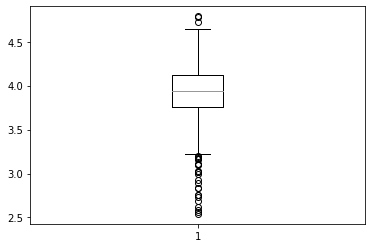

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df.head()

plt.boxplot(df["Tenacity"])
plt.show()

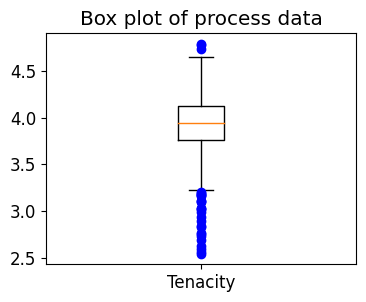

In [ ]:
plt.boxplot(df["Tenacity"],sym="bo")
plt.title("Box plot of process data")
plt.xticks([1],["Tenacity"])
plt.show()

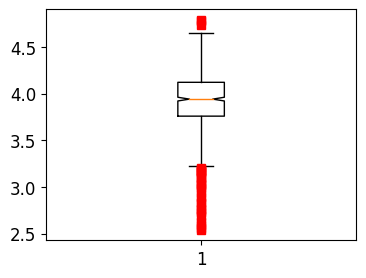

In [ ]:
plt.boxplot(df["Tenacity"],notch=1,sym="rs")
plt.show()

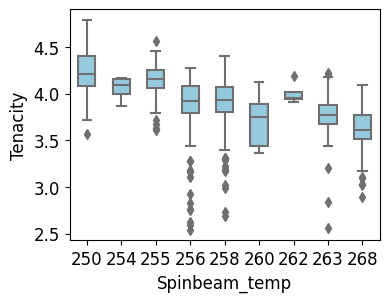

In [ ]:
sns.boxplot(x="Spinbeam_temp",y="Tenacity",data=df,width=0.5,color="skyblue")
#plt.boxplot(df["Tenacity"],sym="bo")
plt.show()

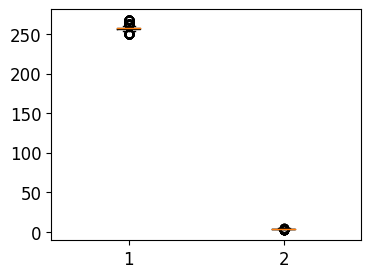

In [ ]:
plt.boxplot([df["Spinbeam_temp"],df["Tenacity"]])
plt.show()

In [ ]:
Q1 = df['Tenacity'].quantile(0.25)
Q3 = df['Tenacity'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Tenacity'] >= Q1 - 1.5 * IQR) & (df['Tenacity'] <= Q3 + 1.5 *IQR)
df_after_box = df.loc[filter] 

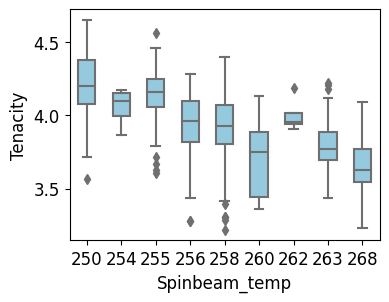

In [ ]:
sns.boxplot(x="Spinbeam_temp",y="Tenacity",data=df_after_box,width=0.5,color="skyblue")
#plt.boxplot(df["Tenacity"],sym="bo")

{'boxes': [<matplotlib.lines.Line2D at 0x7f6012eb8e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6012ec8ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f60130eff10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f60130ef9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6012ec8450>,
  <matplotlib.lines.Line2D at 0x7f6012ec8990>]}

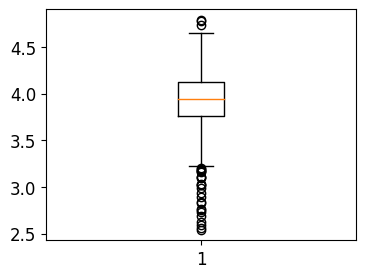

In [ ]:
plt.boxplot(df["Tenacity"])

In [ ]:
print(df_after_box)

NameError: ignored

In [ ]:
from pyod.models.knn import KNN 

ModuleNotFoundError: ignored

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.3 MB/s 
  Created wheel for pyod: filename=pyod-1.0.3-py3-none-any.whl size=154726 sha256=ee22b5ea1d2a0625aa02b722e614c8bc9635a13dccac7d10ce77921978c14df9
  Stored in directory: /root/.cache/pip/wheels/60/1e/04/b42e786399bd7503af674d1ec95d93665b1700309ec3525b65
Successfully built pyod


In [ ]:
from pyod.models.cblof import CBLOF   # kNN detector

clf = CBLOF()
clf.fit(df)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [ ]:
y_train_pred = clf.labels_
print(y_train_pred)

[1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
drop = []
mindex = 0
for a in y_train_pred:
  if a == 1:
    drop.append(mindex)
  mindex = mindex+1
print(drop)

[0, 1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 61, 62, 63, 64, 81, 82, 83, 84, 97, 98, 99, 100, 117, 118, 119, 120, 165, 166, 167, 168, 185, 186, 187, 188, 205, 206, 207, 208, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240]


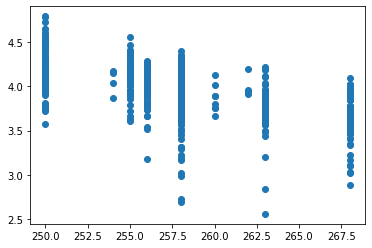

In [ ]:
df_clof = df.drop(drop)
plt.scatter(df_clof["Spinbeam_temp"],df_clof["Tenacity"])
plt.show()

In [ ]:
df_clof.to_excel("/content/clof.xlsx",  sheet_name = 'Sheet1', na_rep = 'NaN', float_format = "%.2f", header = True,index = True, index_label = "id", startrow = 1,startcol = 1, freeze_panes = (2, 0))

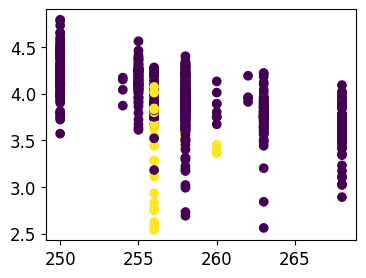

In [ ]:
plt.scatter(df["Spinbeam_temp"],df["Tenacity"],c=y_train_pred,label=y_train_pred)
plt.show()

In [ ]:
cnt = 0
for a in y_train_pred:
  if(a == 1):
    cnt = cnt+1
print(cnt)

82


In [ ]:
clf = CBLOF()
clf.fit(df["Tenacity"].values.reshape(-1, 1))
labeled = clf.labels_

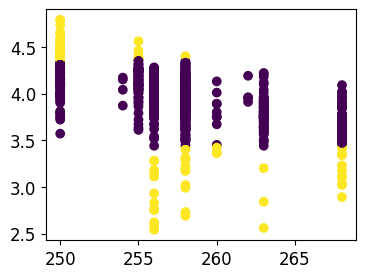

In [ ]:
plt.scatter(df["Spinbeam_temp"],df["Tenacity"],c=labeled,label=labeled)
plt.show()

In [ ]:
cnt = 0
for a in labeled:
  if(a == 1):
    cnt = cnt+1
print(cnt)

81


In [ ]:
df.head(1)

NameError: ignored

In [ ]:
labeling = {"label":[]}
c = {}
sum =0
cnt =0
for a in df.columns.values:
  c[a]=df[a].iloc[0]
print(c)

{'no': 1, 'Spinbeam_temp': 256, 'Roller1_speed': 3500, 'Roller2_speed': 4039, 'Roller2_Temp': 95, 'Draw_ratio': 1.154, 'F/R_speed': 4000, 'Tenacity': 2.75, 'Elongation': 59.2}


In [ ]:
l = []
for idx,row in df.iterrows():
  same = True
  for a in df.columns.values:
    if c[a] != row[a]:
      same=False
      break
  if same == False:
    mean = sum/cnt
    for i in range(cnt):
      if abs(df["Tenacity"].iloc[idx-i]-mean) >= 0.4:
        l.push
    cnt = 1
    sum = row["Tenacity"]
  else :
    sum = sum + row["Tenacity"]
    cnt= cnt+1

